11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1459 - accuracy: 0.9562
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1103 - accuracy: 0.9660
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0912 - accuracy: 0.9718
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0747 - accuracy: 0.9773
Точність на тестових даних: 0.9772999882698059
313/313 [==============================] - 0s 1ms/step


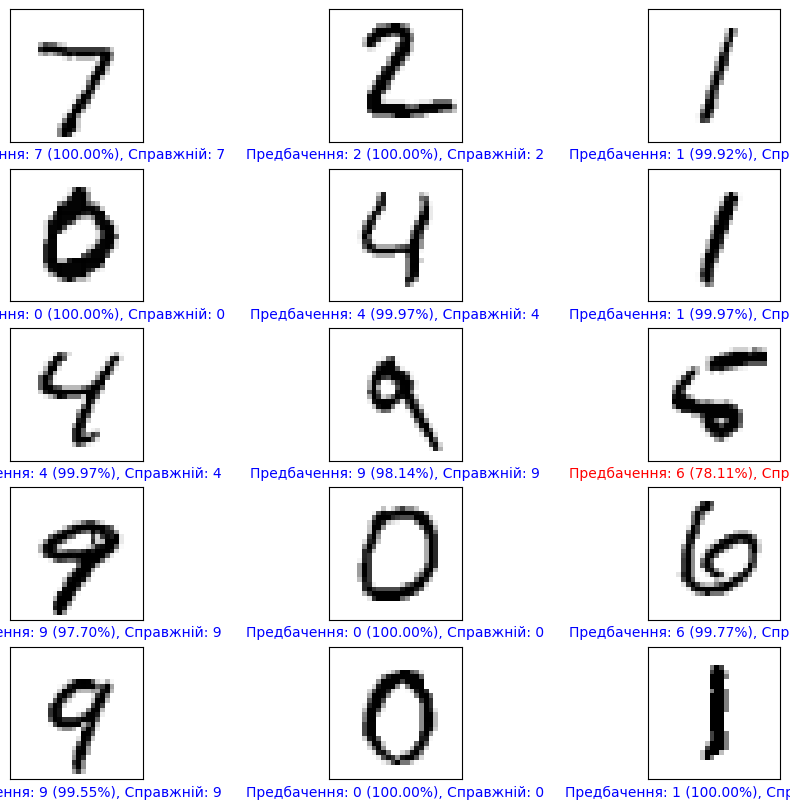

In [1]:
# Імпорт необхідних бібліотек
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Завантаження набору даних MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Підготовка та нормалізація даних
train_images, test_images = train_images / 255.0, test_images / 255.0

# Створення нейронної мережі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),        # Вхідний шар
    # Повнозв'язний шар з активацією ReLU
    layers.Dense(128, activation='relu'),
    # Dropout для запобігання перенавчанню
    layers.Dropout(0.2),
    # Вихідний шар з активацією softmax (10 класів для цифр 0-9)
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Тренування моделі
model.fit(train_images, train_labels, epochs=5)

# Оцінка ефективності моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Точність на тестових даних: {test_acc}")

# Візуалізація результатів класифікації
predictions = model.predict(test_images)

# Функція для відображення зображення та передбачень


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(
        f"Предбачення: {predicted_label} ({100 * tf.reduce_max(predictions_array):.2f}%), Справжній: {true_label}", color=color)


# Візуалізація декількох результатів класифікації
num_rows, num_cols = 5, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
plt.show()